In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AR, AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('SEAFRE42_copy.txt', header=None)

In [3]:
df

,0,1
0,191,14.830
1,231,19.000
2,205,18.670
3,213,24.500
4,204,22.000
...,...,...
111,138,10.500
112,115,8.833
113,150,11.000
114,142,10.670


In [4]:
volume = df[0].to_numpy()

In [5]:
occupancy = df[1].to_numpy()

In [6]:
volume

array([191, 231, 205, 213, 204, 211, 186, 197, 199, 180, 184, 179, 198,
       198, 199, 175, 187, 200, 199, 166, 192, 208, 206, 172, 177, 190,
       214, 173, 184, 193, 135, 204, 199, 199, 197, 177, 190, 186, 199,
       199, 207, 197, 174, 197, 198, 145, 189, 182, 194, 198, 189, 208,
       155, 194, 176, 178, 181, 161, 192, 161, 178, 138, 163, 195, 178,
       170, 191, 189, 211, 200, 184, 148, 160, 150, 159, 152, 194, 196,
       189, 193, 212, 205, 209, 219, 194, 151, 184, 195, 194, 201, 182,
       182, 205, 208, 172, 184, 191, 207, 182, 170, 177, 185, 185, 191,
       202, 162, 149, 154, 144, 147, 156, 138, 115, 150, 142, 144],
      dtype=int64)

In [7]:
occupancy

array([14.83 , 19.   , 18.67 , 24.5  , 22.   , 24.67 , 29.83 , 24.5  ,
       23.33 , 29.5  , 24.   , 25.17 , 22.67 , 20.17 , 19.83 , 25.67 ,
       26.17 , 21.17 , 25.   , 29.17 , 20.17 , 21.83 , 23.5  , 28.33 ,
       26.5  , 22.33 , 22.33 , 28.5  , 23.   , 23.5  , 33.33 , 21.   ,
       20.83 , 21.33 , 27.17 , 28.33 , 22.   , 29.5  , 23.67 , 19.33 ,
       20.5  , 19.33 , 24.5  , 21.33 , 23.   , 34.83 , 26.33 , 27.   ,
       23.67 , 20.5  , 19.67 , 20.5  , 28.   , 23.83 , 27.   , 29.   ,
       24.5  , 32.33 , 26.17 , 27.   , 24.83 , 22.67 , 22.5  , 25.17 ,
       26.   , 24.33 , 27.5  , 20.17 , 21.17 , 18.83 , 24.67 , 34.5  ,
       30.83 , 30.   , 27.   , 13.83 , 19.   , 18.5  , 19.   , 21.17 ,
       20.83 , 21.   , 20.   , 19.83 , 26.   , 34.5  , 22.5  , 26.17 ,
       27.33 , 21.17 , 18.83 , 25.67 , 21.33 , 22.67 , 24.17 , 21.83 ,
       19.33 , 21.67 , 26.   , 22.83 , 18.17 , 18.83 , 18.83 , 18.83 ,
       18.83 , 11.83 , 11.83 , 11.33 , 11.33 , 11.17 , 12.33 , 10.5  ,
      

Text(0.5, 1.0, 'Volume vs Occupancy')

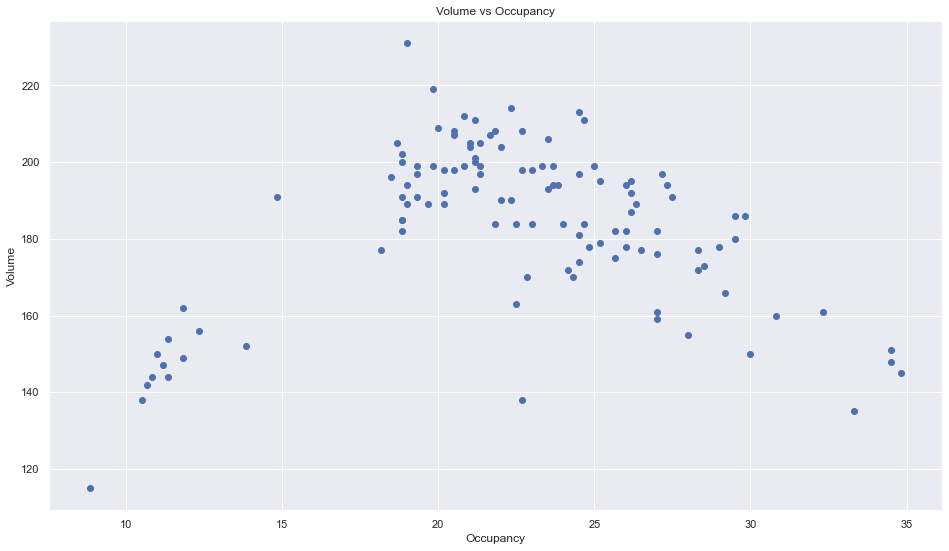

In [18]:
fig = plt.figure(figsize=(16, 9))
plt.scatter(occupancy, volume, c='b')
plt.ylabel('Volume')
plt.xlabel('Occupancy')
plt.title('Volume vs Occupancy')

In [66]:
data = pd.DataFrame()
data['occupancy'] = occupancy.copy()
data['volume'] = volume.copy()
# data['occupancy_squared'] = occupancy**2

In [67]:
model = smf.glm(formula='volume ~ occupancy + I(occupancy**2) -1', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 volume   No. Observations:                  116
Model:                            GLM   Df Residuals:                      114
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          173.45
Method:                          IRLS   Log-Likelihood:                -462.63
Date:                Thu, 06 May 2021   Deviance:                       19773.
Time:                        00:39:25   Pearson chi2:                 1.98e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
occupancy            17.7842      0.281     63.377      0.000      17.234      18.334
I(occupancy ** 2)    -0.4047      0.011    -36.429      0.000      -0.427      -0.383
=====================================================================================
"""

In [38]:
residuals = model.resid_working

Text(0.5, 1.0, 'Residuals')

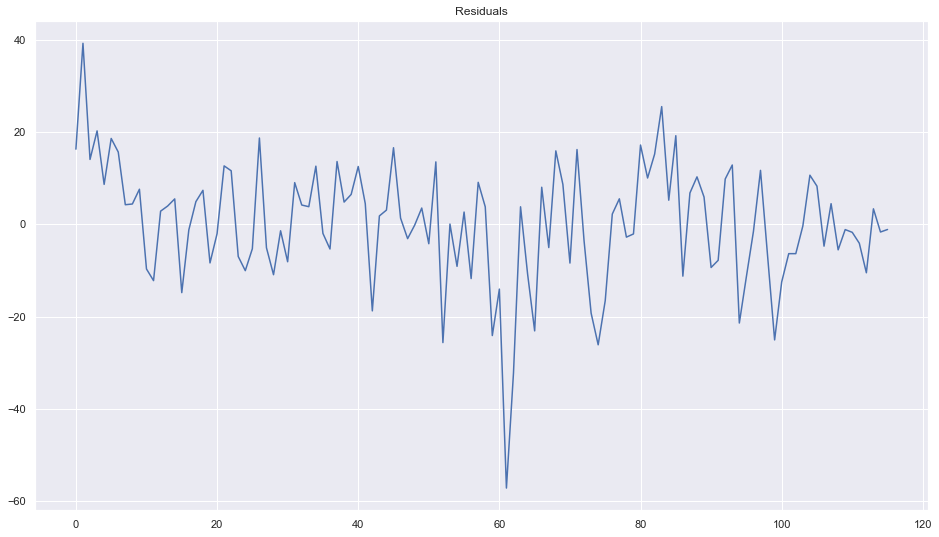

In [40]:
fig = plt.figure(figsize=(16, 9))
residuals.plot()
plt.title('Residuals')

In [13]:
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')


#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)



def tsplot(y, lags=None, figsize=(16, 20), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (3,1)
        ts_ax = plt.subplot2grid(layout, (0,0))
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (2,0))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
def optimize_SARIMA(data, parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [33]:
def plotter(dataset, name):
    dataset.plot(title=f'Timeseries plot for dataset {name}', figsize=(16, 9), c='blue')
    plt.xlabel('Time')
    plt.ylabel(f'Dataset {name}')
    plt.title(f'Time series plot for {name}')
    plt.show()
    
def plt_pred(predictions, actual, name):
    predictions.plot(label='Prediction')
    actual.plot(label='Observed')
    plt.xlabel('Time')
    plt.ylabel(name)
    plt.title(f'Time series plot for {name}')
    plt.legend()
    plt.show()
    print(f"\nr2_score = {r2_score(actual, predictions)}")
    print(f'MSE: {((predictions - actual)**2).mean()}')

In [34]:
adf_test = adfuller(df[0])
print("ADF = " + str(adf_test[0]))
print("p-value = " +str(adf_test[1]))

ADF = -3.328685408041556
p-value = 0.013643925896126754


In [35]:
# import pmdarima as pm
# model = pm.auto_arima(residuals, error_action='ignore', trace=0, suppress_warnings=True, seasonal=False)
# print(model.summary())
# model.plot_diagnostics(figsize=(16,9))

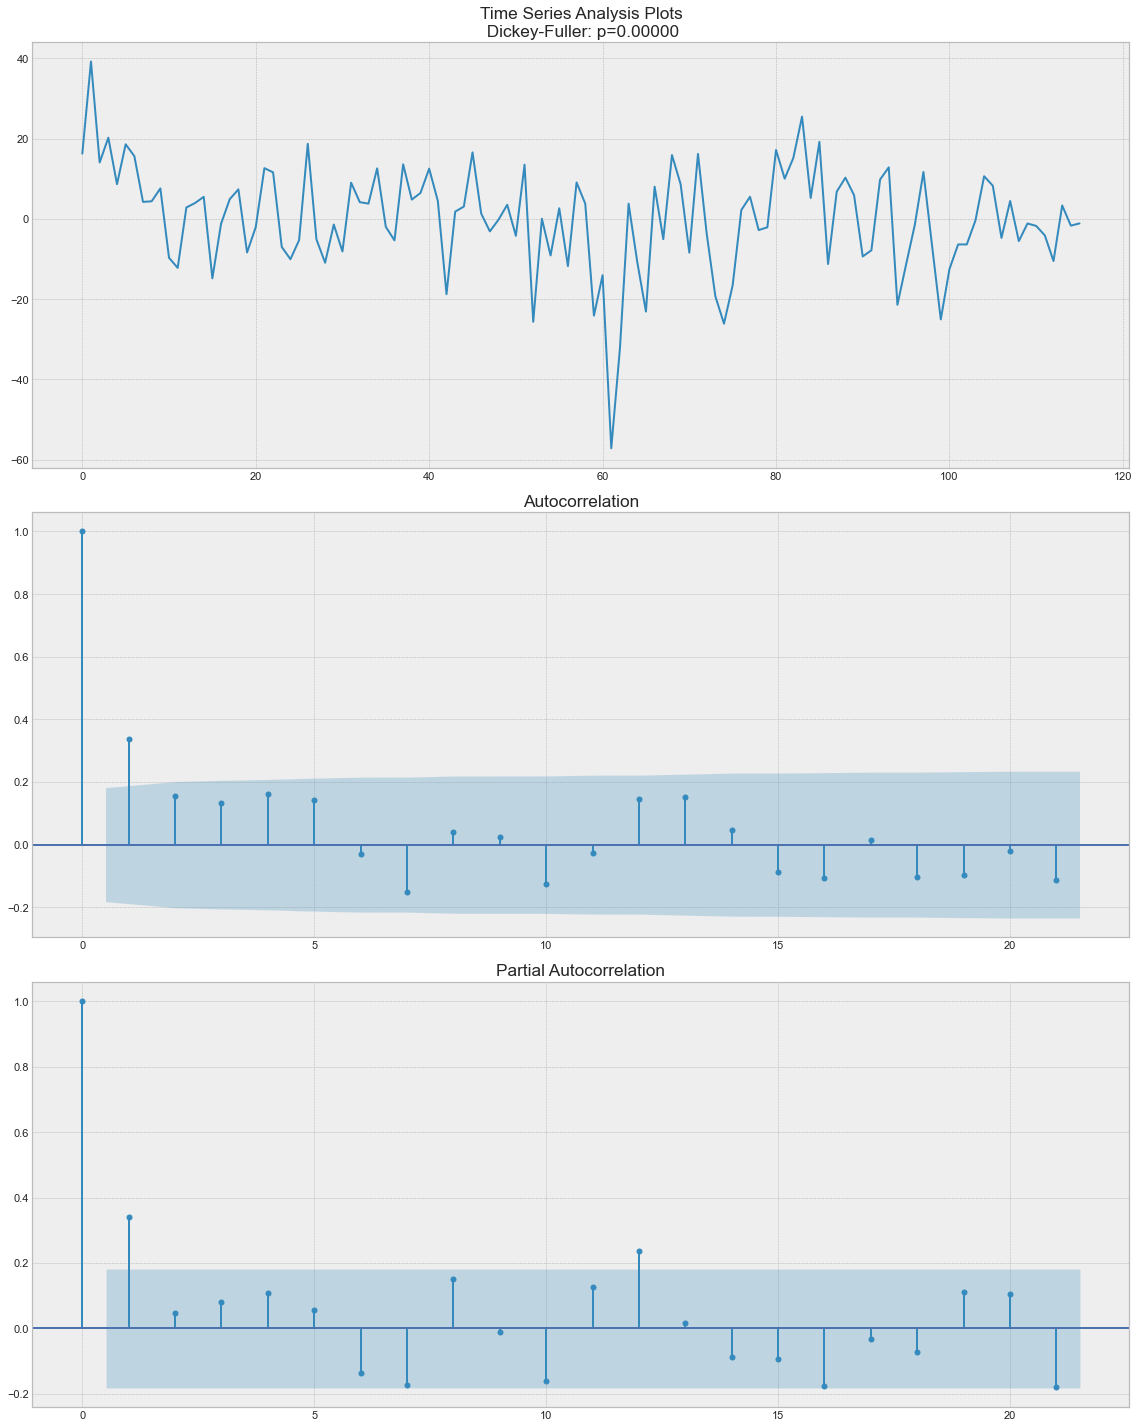

In [36]:
tsplot(residuals)

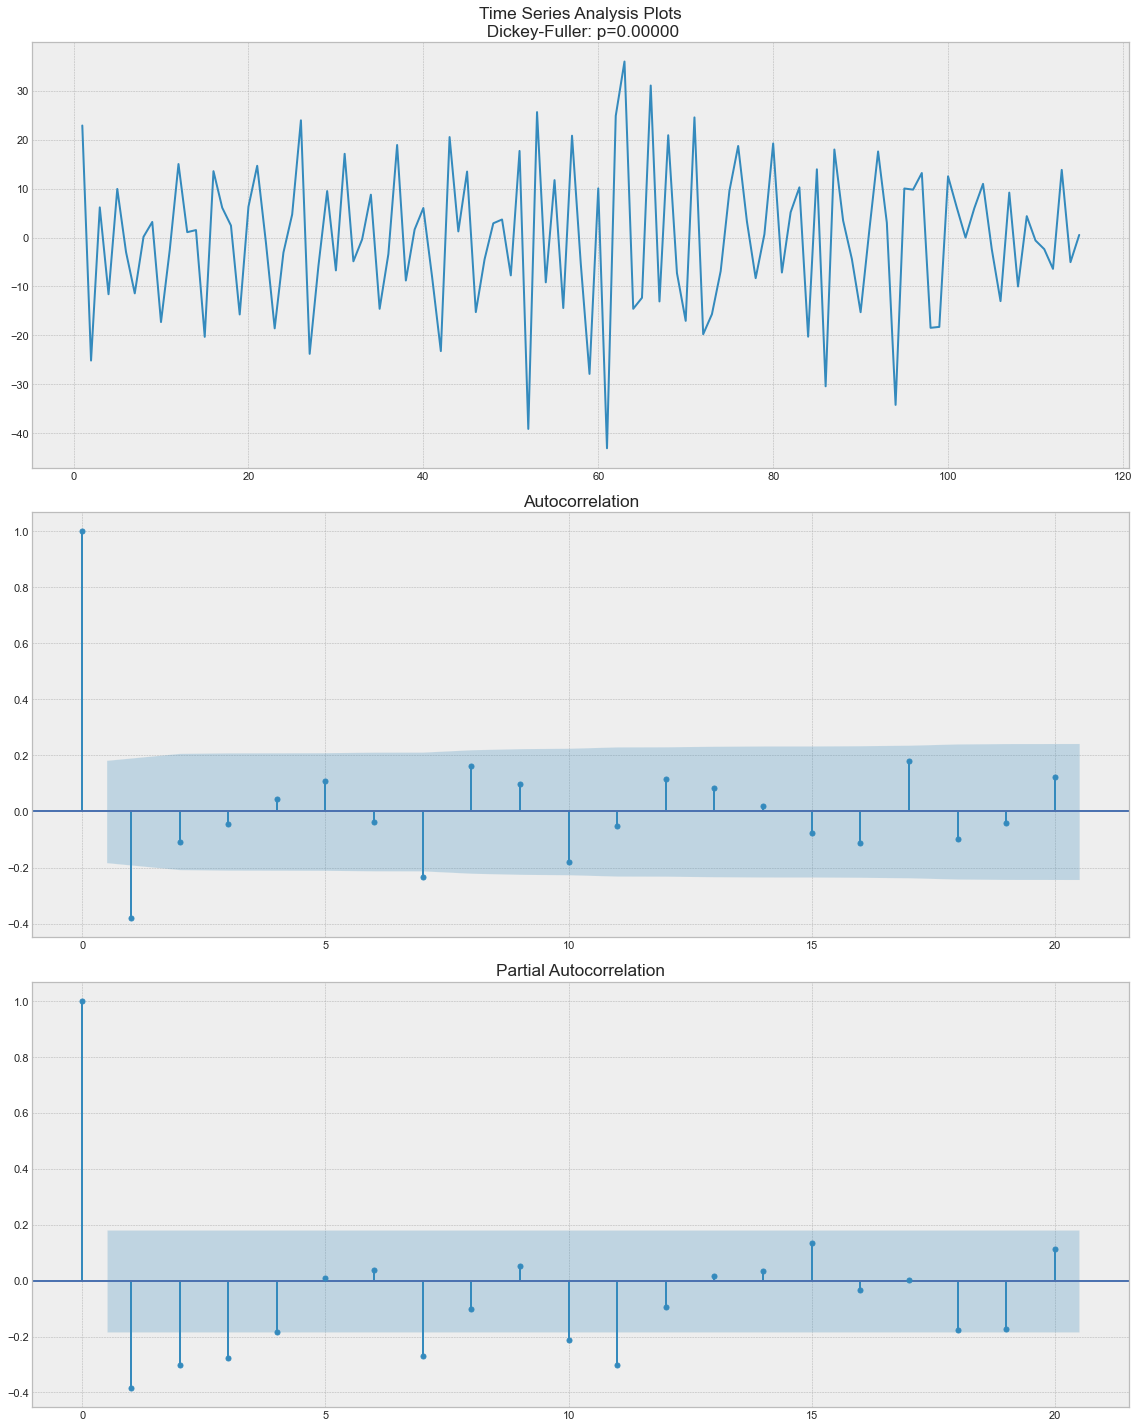

In [74]:
data_diff = residuals - residuals.shift(1)
tsplot(data_diff[1:], lags=20)

In [41]:
residuals

0      16.274945
1      39.212432
2      14.049811
3      20.234225
4       8.643285
         ...    
111    -4.111264
112   -10.509106
113     3.347625
114    -1.677948
115    -1.131103
Length: 116, dtype: float64

In [43]:
import pmdarima as pm
model1 = pm.auto_arima(residuals, error_action='ignore', trace=0, suppress_warnings=True)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -455.604
Date:                Thu, 06 May 2021   AIC                            915.208
Time:                        00:17:54   BIC                            920.715
Sample:                             0   HQIC                           917.443
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3385      0.091      3.716      0.000       0.160       0.517
sigma2       150.8543     14.906     10.121      0.000     121.640     180.069
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.28
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.70
Prob(H) (two-sided):                  0.79   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
model = ARIMA(residuals, order=(4, 0, 0))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -454.206
Date:                Thu, 06 May 2021   AIC                            920.412
Time:                        00:48:03   BIC                            936.933
Sample:                             0   HQIC                           927.119
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3971      2.354      0.169      0.866      -4.217       5.012
ar.L1          0.3051      0.105      2.916      0.004       0.100       0.510
ar.L2          0.0361      0.093      0.388      0.698      -0.146       0.218
ar.L3          0.0495      0.108      0.460      0.646      -0.162       0.261
ar.L4          0.1215      0.105      1.161      0.246      -0.084       0.327
sigma2       147.1446     16.172      9.099      0.000     115.448     178.841
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                37.24
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.73
Prob(H) (two-sided):                  0.91   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
model = ARIMA(residuals, order=(0, 0, 2))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -455.871
Date:                Thu, 06 May 2021   AIC                            919.742
Time:                        00:48:03   BIC                            930.756
Sample:                             0   HQIC                           924.213
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1066      1.745      0.061      0.951      -3.314       3.528
ma.L1          0.3186      0.099      3.221      0.001       0.125       0.512
ma.L2          0.1149      0.083      1.383      0.167      -0.048       0.278
sigma2       151.5528     17.104      8.861      0.000     118.030     185.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.69
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
model = ARIMA(residuals, order=(4, 1, 2))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -451.608
Date:                Thu, 06 May 2021   AIC                            917.216
Time:                        00:57:21   BIC                            936.430
Sample:                             0   HQIC                           925.015
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7981      0.152     -5.239      0.000      -1.097      -0.500
ar.L2         -1.2287      0.135     -9.118      0.000      -1.493      -0.965
ar.L3         -0.6981      0.121     -5.746      0.000      -0.936      -0.460
ar.L4         -0.3893      0.090     -4.347      0.000      -0.565      -0.214
ma.L1          0.2429      0.103      2.347      0.019       0.040       0.446
ma.L2          0.7676      0.133      5.767      0.000       0.507       1.029
sigma2       149.2029     18.744      7.960      0.000     112.465     185.941
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 7.13
Prob(Q):                              0.69   Prob(JB):                         0.03
Heteroskedasticity (H):               1.30   Skew:                            -0.39
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

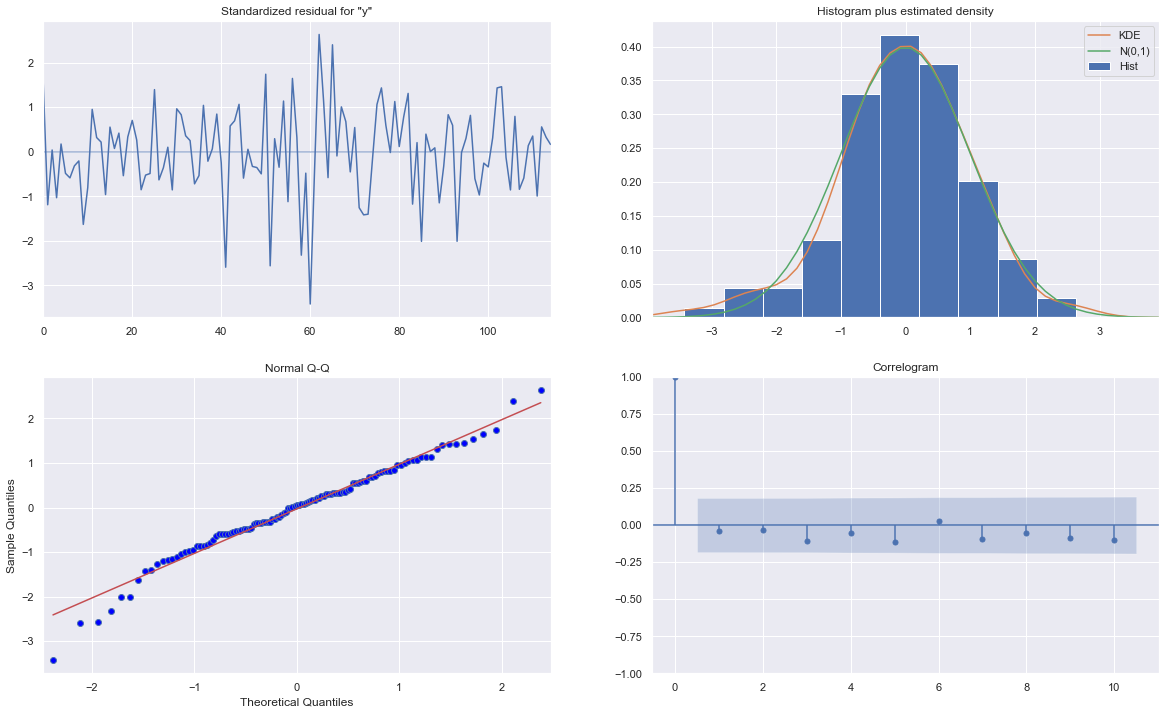

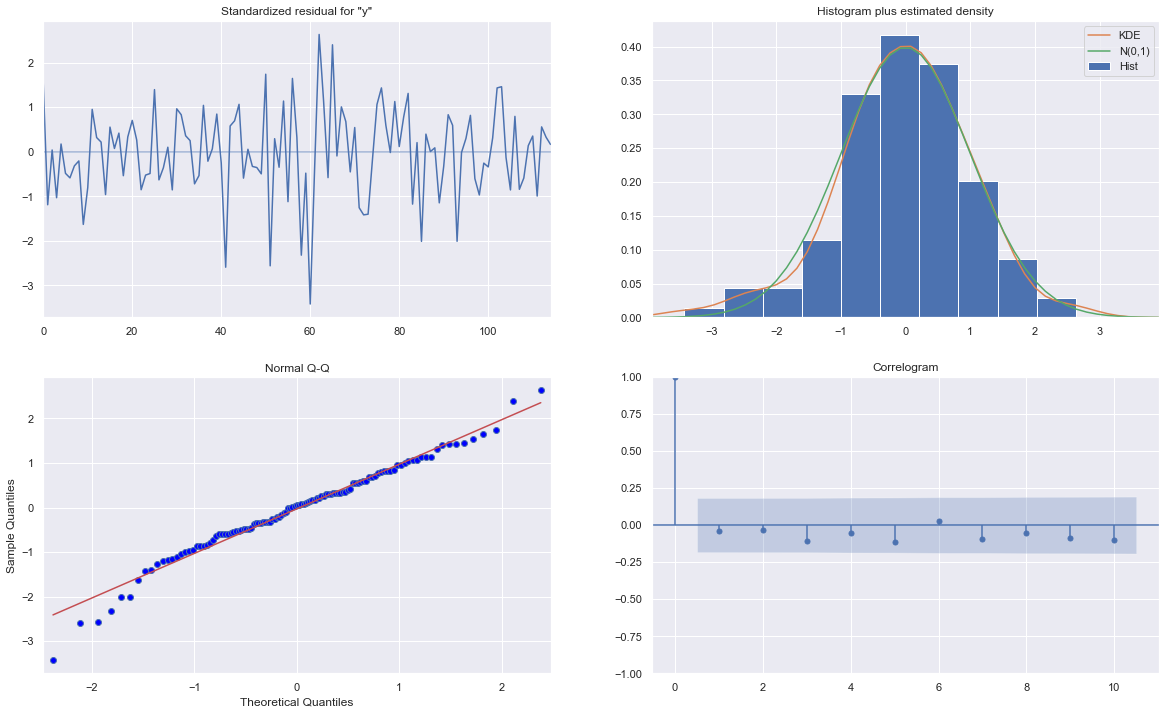

In [88]:
model_fitted.plot_diagnostics(figsize=(20, 12))

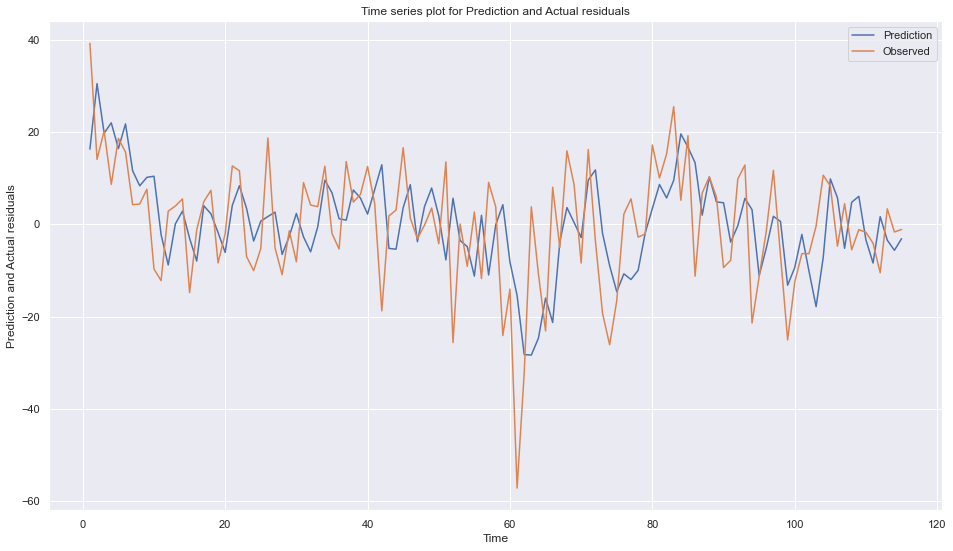


r2_score = 0.10666070219611734
MSE: 151.53641017205908


In [89]:
plt.figure(figsize=(16, 9))
plt_pred(predictions=model_fitted.fittedvalues[1:], actual=residuals[1:], name="Prediction and Actual residuals")

In [96]:
# ADDING a lag

data['lag_1'] = data['occupancy'].shift(1)
data.dropna(inplace=True)

In [97]:
model = ARIMA(endog=data[['occupancy']], exog=data[['lag_1']], order=(4, 1, 2))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              occupancy   No. Observations:                  115
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -316.516
Date:                Thu, 06 May 2021   AIC                            649.031
Time:                        01:00:08   BIC                            670.921
Sample:                             0   HQIC                           657.915
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lag_1         -0.4442      0.638     -0.696      0.486      -1.694       0.806
ar.L1          0.0879      0.430      0.204      0.838      -0.754       0.930
ar.L2          0.0910      0.272      0.334      0.738      -0.443       0.624
ar.L3          0.0539      0.141      0.382      0.702      -0.223       0.330
ar.L4         -0.1804      0.114     -1.584      0.113      -0.404       0.043
ma.L1         -0.1044      0.368     -0.284      0.776      -0.825       0.616
ma.L2         -0.5366      0.292     -1.839      0.066      -1.108       0.035
sigma2        14.9911      2.174      6.896      0.000      10.730      19.252
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 7.47
Prob(Q):                              0.88   Prob(JB):                         0.02
Heteroskedasticity (H):               0.84   Skew:                             0.55
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

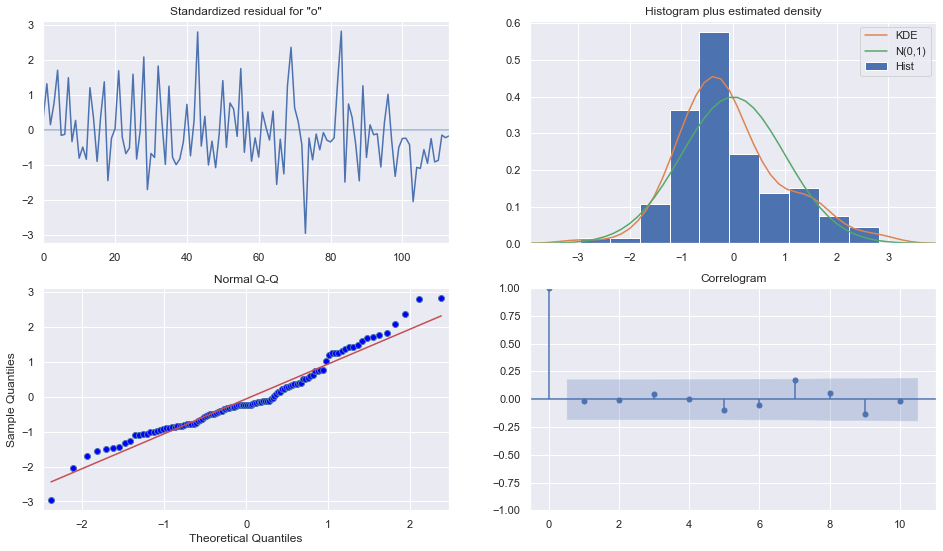

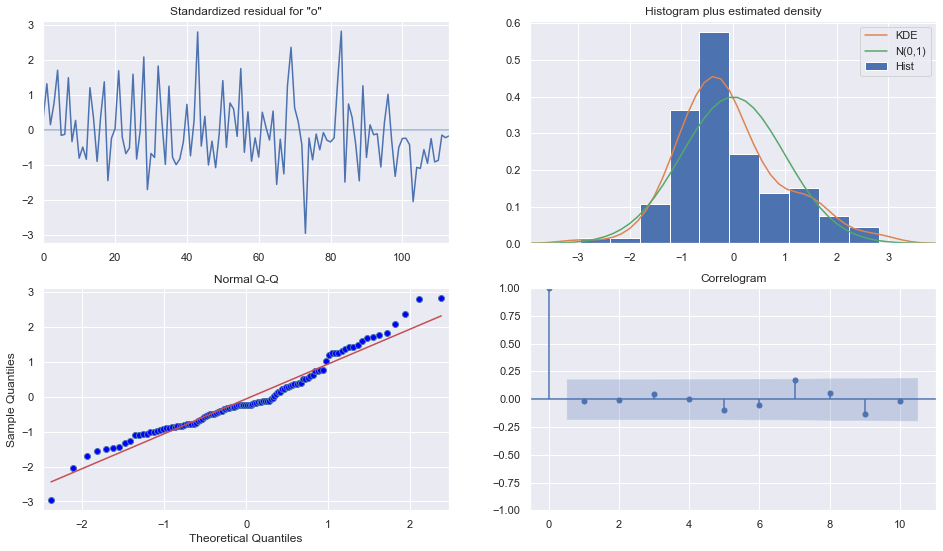

In [103]:
model_fitted.plot_diagnostics(figsize=(16,9))

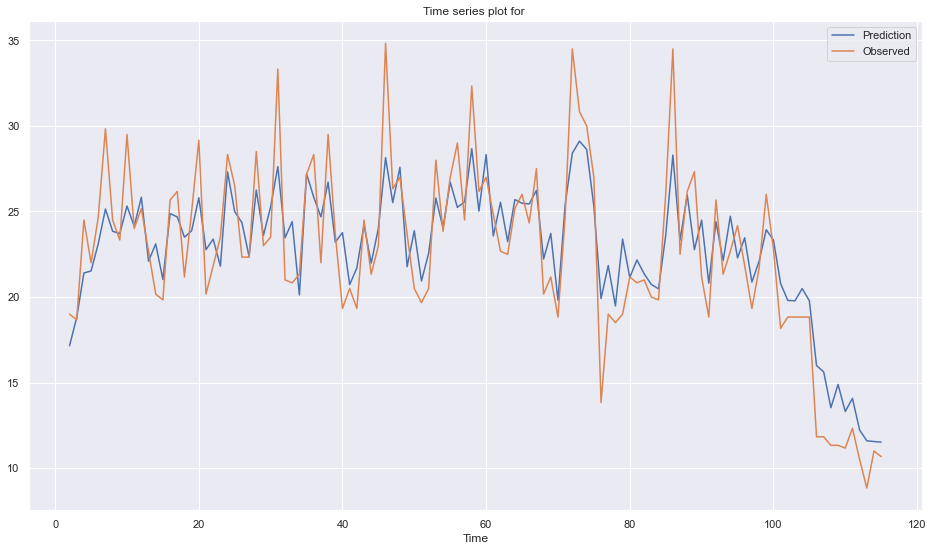


r2_score = 0.7975440895054933
MSE: 5.614583762908938


In [107]:
plt.figure(figsize=(16, 9))
plt_pred(predictions=model_fitted.fittedvalues[1:], actual=data['lag_1'][1:], name="")